In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load dataset from input directory
df = pd.read_csv("Desktop/ML_Final_Project/cv-valid-test.csv")
df[df['age'].notna()].head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
1,sample-000001,i've got to go to him,1,0,twenties,male,NaN,NaN
3,sample-000003,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
5,sample-000005,down below in the darkness were hundreds of pe...,4,1,twenties,male,us,NaN
6,sample-000006,strange images passed through my mind,3,0,twenties,male,NaN,NaN
7,sample-000007,the sheep had taught him that,2,0,thirties,male,NaN,NaN


In [3]:
import os


folder_path = 'Desktop/ML_Final_Project/cv-valid-test'  # Replace this with the path to your folder

# Get the list of files in the folder
files = os.listdir(folder_path)

# Print the number of files
print(f'Number of files in the folder: {len(files)}')


Number of files in the folder: 3995


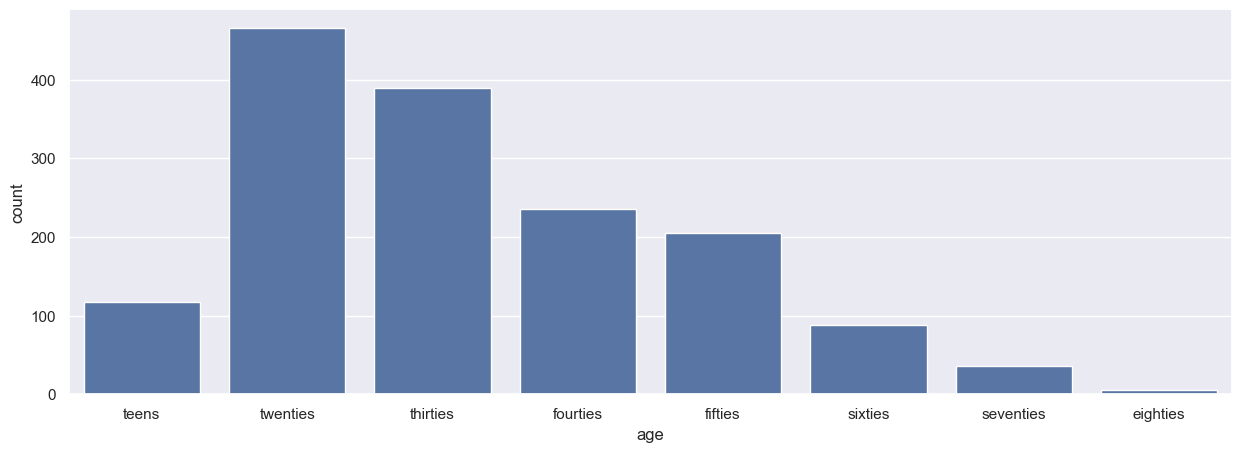

In [4]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age",
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

In [5]:
df = df[['filename','age']]
data = df[df['age'].notna() ]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age
0,sample-000001,twenties
1,sample-000003,twenties
2,sample-000005,twenties
3,sample-000006,twenties
4,sample-000007,thirties


In [6]:
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.shape

(1542, 2)

In [8]:
import librosa
ds_path = "Desktop/ML_Final_Project/cv-valid-test"
import numpy as np

def feature_extraction(filename, sampling_rate=22050):
    path = "{}/{}.mp3".format(ds_path, filename)
    features = list()
    try:
        audio, _ = librosa.load(path, sr=sampling_rate)
    except:
        return None

    # Chroma Features
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio, sr=sampling_rate).T, axis=0)
    features.extend(chroma_stft)

    chroma_cqt = np.mean(librosa.feature.chroma_cqt(y=audio, sr=sampling_rate).T, axis=0)
    features.extend(chroma_cqt)

    # Corrected chroma_vqt usage
    chroma_vqt = np.mean(librosa.feature.chroma_vqt(y=audio, sr=sampling_rate, intervals='ji5').T, axis=0)
    features.extend(chroma_vqt)

    # Spectrogram Features
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=audio, sr=sampling_rate).T, axis=0)
    features.extend(melspectrogram)

    # MFCC Features
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))

    # RMS Feature
    rms_value = np.mean(librosa.feature.rms(y=audio))
    features.append(rms_value)

    # Spectral Features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    features.append(spectral_centroid)

    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    features.append(spectral_bandwidth)

    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sampling_rate))
    features.append(spectral_contrast)

    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=audio))
    features.append(spectral_flatness)

    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(spectral_rolloff)

    # Additional Feature
    tonnetz = np.mean(librosa.feature.tonnetz(y=audio, sr=sampling_rate))
    features.append(tonnetz)

    return features







features = feature_extraction(data.iloc[0]['filename'])
print("features: ", len(features))

features:  191


In [10]:
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 73768

    for idx, row in orig.iterrows():
        if idx >= stop_counter:
            break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        if features is not None:
            features.append(row['age'])
            new_rows.append(features)

    # Extract the correct number of features from the first row (assuming all rows have the same number of features)
    try:
        num_features = len(new_rows[0])
        feature_columns = [f"feature_{i}" for i in range(1, num_features + 1)]
        return pd.DataFrame(new_rows, columns=feature_columns)
    except:
        return pd.DataFrame()


df_features = create_df_features(data)
df_features.to_csv('Desktop/ML_Final_Project/CNN_test_dataframe.csv', index=False)


1541/1541